# Classification

Hadaf ine ke biaim va datamoon ro be 2 ya chand daste mokhtalef taghsim konim.

* Mesale sade: axe ghaza haye mokhtalef ro tashkhis bede.

Mitoonim classification ro be 3 daste kolli taghsim konim.

1. `Binary classification`: yani faghat dota kelas daram. masalan mikhaim bebinim ke marize morede nazaremoon saratan dare ya na. ma mitoonim ehtemale inke javab marboot be kudum kelas bashe ro ham bedim.
2. `Multi-class classification`: inja ma chand ta daste bandi darim (bishtar az 2 ta) va mikhaim bebinim ke kudum kelas baraye mesale ma hastesh.
3. `Mutli-label classification`: ma be har vurudi mitoonim 1 ya tedade bishtari label ekhtesas bedim.


Tafavote `multi-class` va `binary` classification tooye code e tensorflow.

Yademoon bashe ke ma hamishe se ghadam baraye sakhte neural network darim.
1. Sakhte model:
* Bayad tooye layeye akhare neural network baraye `binary classification` az `sigmoid` activation function estefade konim. ama agar khastim az `multi-class classification` estefade konim bayad az `softmax` activation function estefade konim.
2. Compile the model
3. Train
* baraye loss function tooye `binary` bayad az `BinaryCrossEntropy` estefade konim ama baraye loss function e `multi-class classification` bayad az `CategoricalCrossEntropy` estefade

In [27]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles

In [28]:
x, y = make_circles(n_samples=500,
                    noise=0.05)

In [29]:
x[:10]

array([[ 0.44798034, -0.85526517],
       [-0.23126815,  0.98177264],
       [ 1.01867875,  0.28689736],
       [ 0.19412159, -0.95860455],
       [-0.22915755, -0.86985437],
       [-0.48681031,  0.88049836],
       [-0.12787856,  0.78405089],
       [-0.58151727, -0.46573603],
       [-0.44955327,  0.8551154 ],
       [ 0.78414878,  0.54916862]])

In [30]:
y[:10]

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [31]:
x.shape

(500, 2)

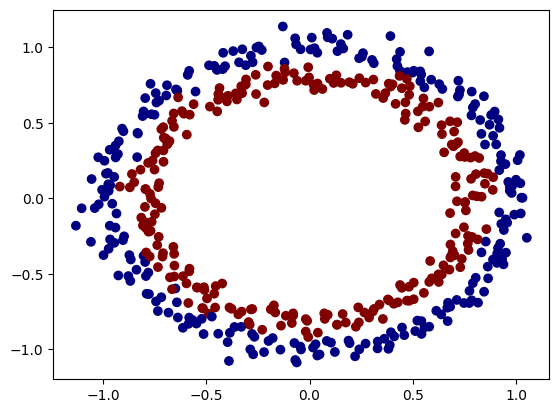

In [32]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='jet')
plt.show()

In [33]:
# Sample avval ro begirim va shape esh ro bebinim
x[0].shape

(2,)

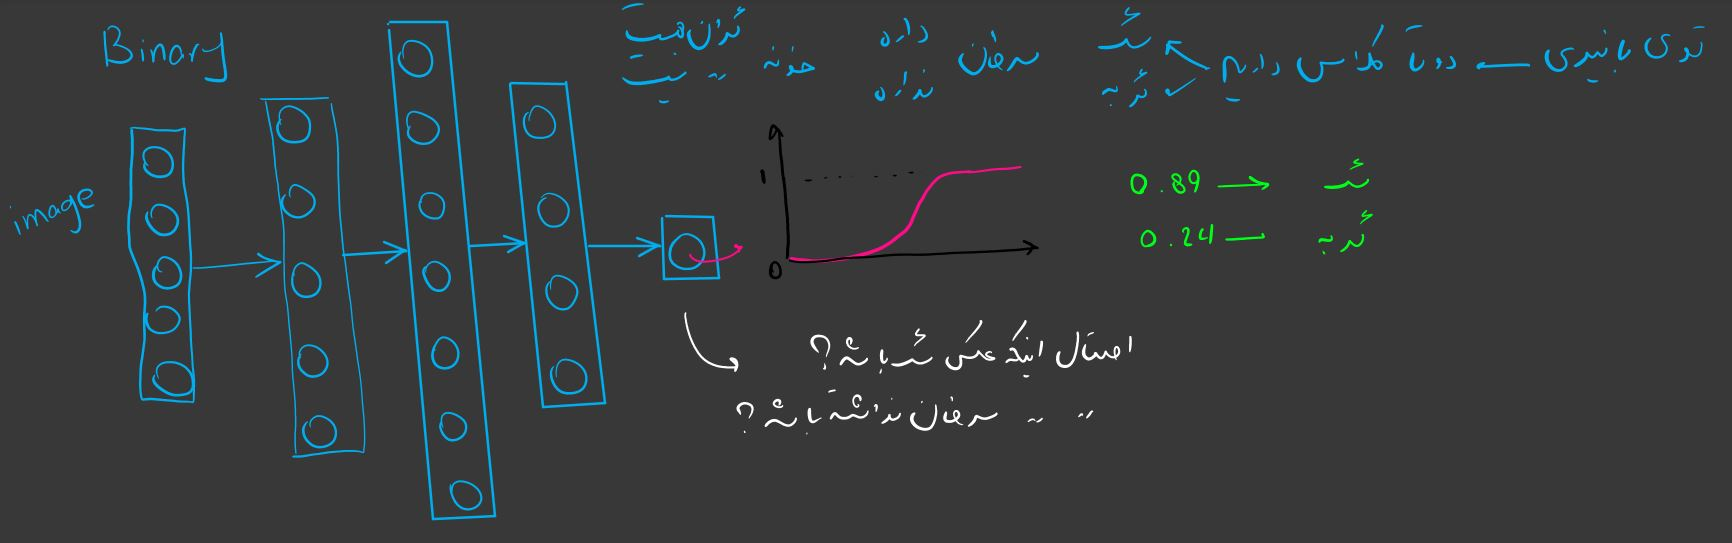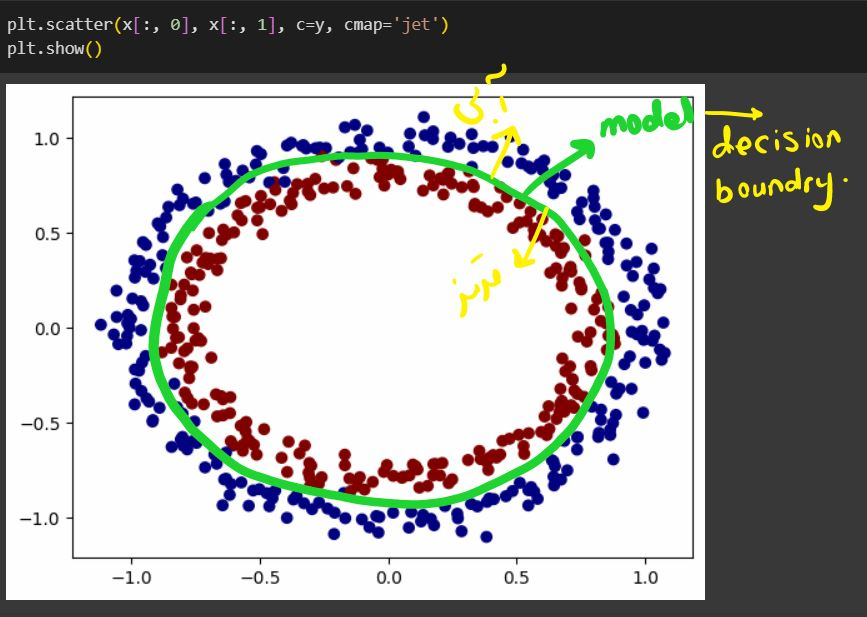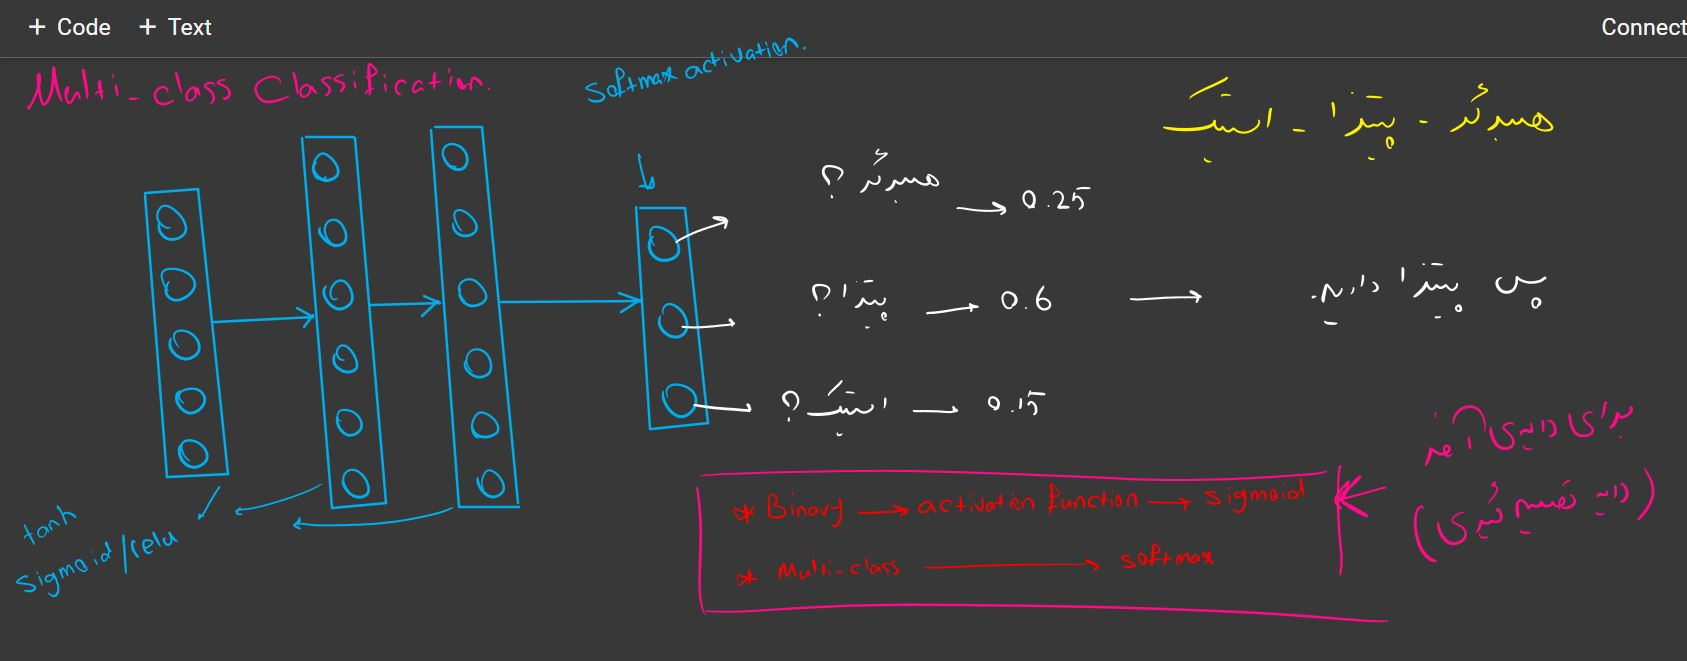

In [34]:
x[3].shape

(2,)

In [46]:
# Sakhtane model
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(2,))
])

Baraye inke biaim va tooye model haye `binary classification` loss ro tarif konim bayad az `BinaryCrossentropy` estefade konim.

In [47]:
# Compile
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [48]:
# Fit kardane model
history = model.fit(x,
                    y,
                    epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 5.1758 - accuracy: 0.4980
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 5.1617 - accuracy: 0.4980
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 5.1466 - accuracy: 0.5000
Epoch 4/10
16/16 [==============================] - 0s 1ms/step - loss: 5.1423 - accuracy: 0.5020
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 5.1310 - accuracy: 0.5020
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 5.1178 - accuracy: 0.5020
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 5.0925 - accuracy: 0.5020
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 5.0665 - accuracy: 0.5020
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 5.0615 - accuracy: 0.5000
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 5.0517 - accuracy: 0.5020


In [49]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.5)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 781us/step
doing multiclass classification...


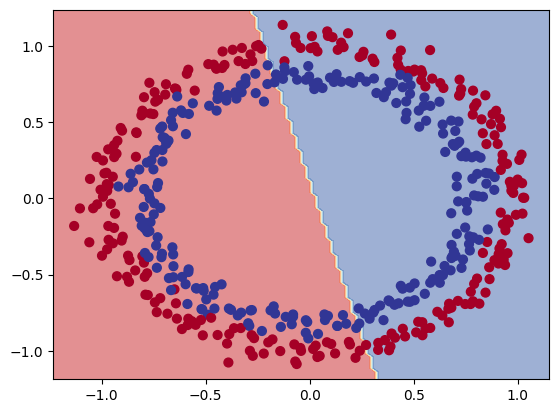

In [50]:
plot_decision_boundary(model, x, y)

Be in nokte deghat konim ke agar tooye yek laye `activation function` ro tarif nakonim, be soorate default tensorflow oon ro `linear` dar nazar migire. be hamin dalil hastesh ke model ma dar enteha yek khat ro pishbini karde.

In [60]:
# model 2
model_2 = keras.Sequential([
    keras.layers.Dense(64, input_shape=(2,)),
    keras.layers.Dense(32),
    keras.layers.Dense(1)
])

In [61]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                192       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2305 (9.00 KB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
(2 + 1) * 64

192

In [63]:
model_2.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

In [64]:
model_2.fit(x,
            y,
            epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 1ms/step - loss: 3.8562 - accuracy: 0.4660
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 2.1509 - accuracy: 0.4580
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7246 - accuracy: 0.4780
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.7118 - accuracy: 0.4760
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6993 - accuracy: 0.4900
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4840
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4160
Epoch 8/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4740
Epoch 9/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6946 - accuracy: 0.4720
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4900
Epoch 11/

313/313 [==============================] - 0s 843us/step
doing binary classifcation...


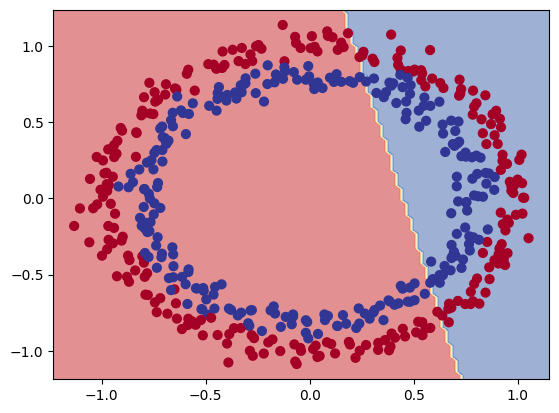

In [65]:
plot_decision_boundary(model_2, x, y)

In [89]:
# model 3
model_3 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(2,), activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [90]:
model_3.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

In [91]:
model_3.fit(x,
            y,
            epochs=200)

Epoch 1/200
16/16 [==============================] - 1s 1ms/step - loss: 0.6884 - accuracy: 0.5000
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5000
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6853 - accuracy: 0.5000
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.5000
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.5000
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6809 - accuracy: 0.5000
Epoch 7/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6796 - accuracy: 0.5040
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5100
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.5080
Epoch 10/200
16/16 [==============================] - 0s 1ms/step - loss: 0.6742 - accuracy: 0.5160
Epoch 11/

313/313 [==============================] - 0s 759us/step
doing binary classifcation...


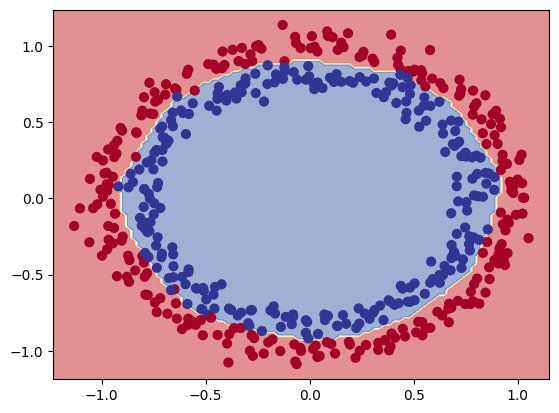

In [92]:
plot_decision_boundary(model_3, x, y)

In [93]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 [==============================] - 0s 0us/step


In [94]:
x_train.shape

(60000, 28, 28)

In [98]:
x_train[10].min(), x_train[20].max()

(0, 255)

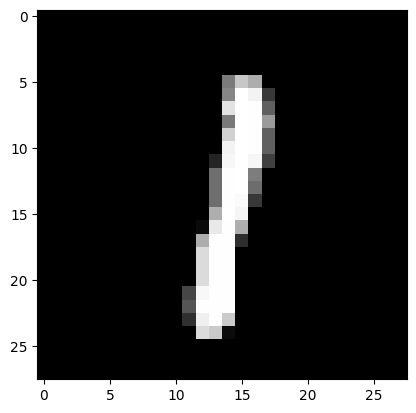

In [117]:
plt.imshow(x_train[1200], cmap='gray')

In [118]:
y_train[1200]

1

In [109]:
x_train[400].shape

(28, 28)

In [112]:
print(x_train[400])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  38 113 207 253 255 253 143  38   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  38 219 252 252 252 253 252 252 234 146   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 191 252 239 180  55 196 214 252 252 252  57   6   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 101 176  65   0   0   0  28 199 252 252 253  43   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  25 205 252 253 167   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  29 253 25

Ydemoon bashe ke yeki az mohem tarin ghesmat ha tooye train kardane neural network ha data preprocessing hast. bayad data hamoon ya `Normalize` beshan ya `Standardize` bshan ya `MaxMinNormalization` beshan ta injuri porose yadgiri bara Neural Network emoon rahat tar beshe.

In [119]:
x_train = x_train / 255.
x_test = x_test / 255.

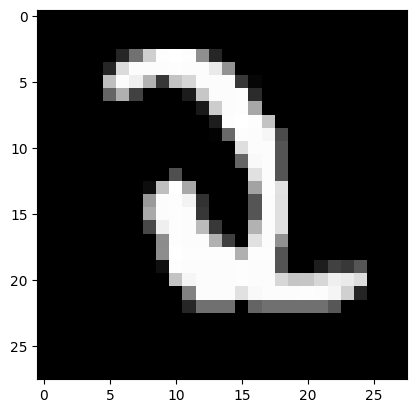

In [121]:
plt.imshow(x_train[400], cmap='gray')

In [122]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [123]:
fruits = ['apple', 'banana', 'cherry']
fruits.append("orange")

In [124]:
fruits

['apple', 'banana', 'cherry', 'orange']